<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Dropout_and_Early_Stop_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Get data
df = pd.read_csv('/content/nba (1).csv', index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
# Drop missings
df.dropna(inplace = True)
# Save X data
X = df.drop(columns = 'TARGET_5Yrs')
# Encode our target
y = df['TARGET_5Yrs']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

In [ ]:
# Without dropout
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6334 - val_loss: 0.5989
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6148 - val_loss: 0.5883
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6021 - val_loss: 0.5800
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5917 - val_loss: 0.5758
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5813 - val_loss: 0.5706
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5733 - val_loss: 0.5678
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5651 - val_loss: 0.5683
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5605 - val_loss: 0.5662
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.5627
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5529 - val_loss: 0.5637
Epoch 11/

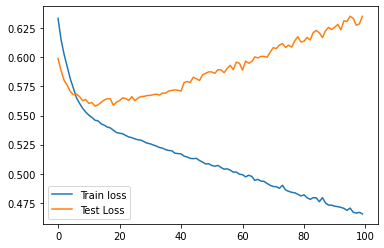

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
# With dropout
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(15, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dropout(.3))
model.add(Dense(8,
                activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6629 - val_loss: 0.6025
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6439 - val_loss: 0.5876
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6262 - val_loss: 0.5819
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6194 - val_loss: 0.5790
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6148 - val_loss: 0.5768
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6031 - val_loss: 0.5747
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6173 - val_loss: 0.5732
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6205 - val_loss: 0.5738
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5997 - val_loss: 0.5741
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6100 - val_loss: 0.5729
Epoch 11/

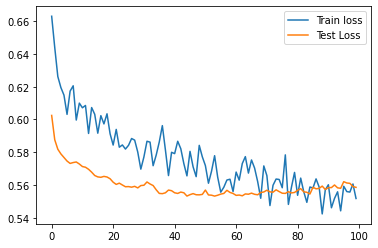

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

# Early Stop


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Get data
df = pd.read_csv('/content/nba (1).csv', index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
# Drop missings
df.dropna(inplace = True)
# Save X data
X = df.drop(columns = 'TARGET_5Yrs')
# Encode our target
y = df['TARGET_5Yrs']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

In [ ]:
# Without early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6587 - val_loss: 0.6132
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6122 - val_loss: 0.5930
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5943 - val_loss: 0.5828
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5856 - val_loss: 0.5769
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5798 - val_loss: 0.5755
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5738 - val_loss: 0.5732
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5700 - val_loss: 0.5715
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5674 - val_loss: 0.5695
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5659 - val_loss: 0.5680
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5617 - val_loss: 0.5686
Epoch 11/

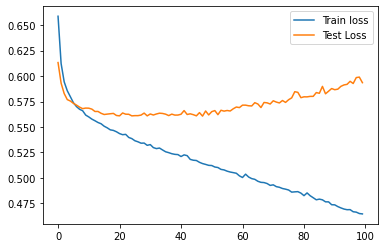

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
# With early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6863 - val_loss: 0.6364
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6208 - val_loss: 0.6022
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5985 - val_loss: 0.5890
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5893 - val_loss: 0.5857
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5835 - val_loss: 0.5821
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5785 - val_loss: 0.5810
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5750 - val_loss: 0.5789
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5720 - val_loss: 0.5771
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5697 - val_loss: 0.5743
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5674 - val_loss: 0.5746
Epoch 11/

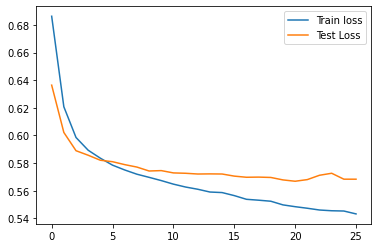

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

#L1 and L2 Regularization

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

layer = layers.Dense(
    units=64,
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
)

In [ ]:
# create model

from keras import regularizers


model4 = Sequential()

model4.add(Dense(14, input_dim = input_dim, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
model4.add(Dropout(.3))
model4.add(Dense(10, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
model4.add(Dropout(.3))
model4.add(Dense(8, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
model4.add(Dropout(.3))
model4.add(Dense(6, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
model4.add(Dropout(.3))
model4.add(Dense(1, activation = 'sigmoid'))
model4.compile(loss = 'bce',
               optimizer = 'adam',
               metrics = ['accuracy',
               metrics.Precision(),
               metrics.Recall()])